In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Homework 3 - PCA and Kmeans Clustering
Andrey Novichkov

In [4]:
df = pd.read_csv('wholesale_customers_data.csv')
print(df.shape)
df.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


**Do some data cleaning**

In [5]:
channel = df['Channel']
df = df.drop(['Channel', 'Region'], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


# Principal Component Analysis

## 1. Scale the data
We are going to normalize the data using sklearn

In [8]:
from sklearn import preprocessing

scaled_df = preprocessing.normalize(df, axis=0)
scaled_df[:1]

array([[0.034663  , 0.04908746, 0.02911003, 0.00177727, 0.02290171,
        0.01991374]])

## 2. Apply PCA

In [14]:
from sklearn.decomposition import PCA

X = np.array(scaled_df.T)

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
X_r

array([[-0.41211926, -0.45077879],
       [ 0.27328223,  0.10585024],
       [ 0.47151571, -0.04990821],
       [-0.59576289, -0.07474473],
       [ 0.60792073, -0.07742833],
       [-0.34483652,  0.54700982]])

## 3. Visualize PCA

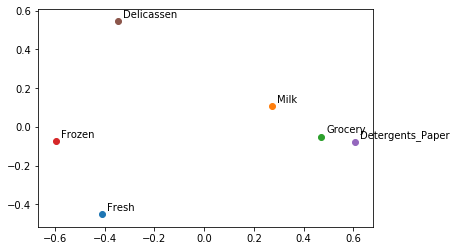

In [19]:
for feature, (plot_x,plot_y) in enumerate(zip(X_r[:, 0], X_r[:, 1])):
    plt.scatter(plot_x, plot_y)
    plt.text(plot_x+0.02, plot_y+0.02, df.columns[feature])

## 4. Make conclusions

From this PCA graph we can see essentially how different or similar these features are from each other. So we can see that there are 3 main clusters, where the biggest difference is between detergents_paper and frozen goods, since the biggest difference is among the PCA1 axis... 

# K-means clustering
The goal is to cluster the DF where the Channel column will be our label. Let's see how well this works and then we can do the same clustering based on DF.

In [33]:
X = df.to_numpy()
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [30]:
channel = np.array(channel)

## 1. Scale the data
We are again just going to normalize it

In [31]:
from sklearn import preprocessing

scaled_df = preprocessing.normalize(df, axis=0)
scaled_df[:1]

array([[0.034663  , 0.04908746, 0.02911003, 0.00177727, 0.02290171,
        0.01991374]])

## 2. Figure out how many clusters we need
Use the elbow technique with distortion

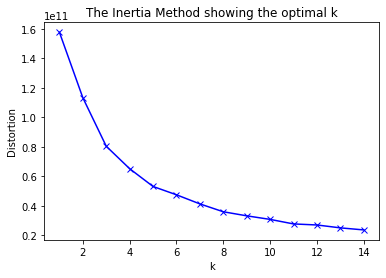

In [37]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Inertia Method showing the optimal k')
plt.show()

Hard to say what the best choice is from this graph, but I am going to go with 5 as its kind of at the tip of this smooth elbow

## 2. Apply the clustering

In [39]:
from sklearn.cluster import KMeans

kcluster = KMeans(n_clusters = 5)
kcluster.fit(X)
kcluster.cluster_centers_

array([[23710.8490566 ,  3882.05660377,  5169.31132075,  3772.44339623,
         1118.26415094,  1693.10377358],
       [ 4991.48148148, 12140.54320988, 18505.50617284,  1591.11111111,
         8148.24691358,  1822.40740741],
       [56453.30769231, 10026.23076923,  8739.        , 15518.07692308,
         1258.23076923,  7170.53846154],
       [20031.28571429, 38084.        , 56126.14285714,  2564.57142857,
        27644.57142857,  2548.14285714],
       [ 6387.80686695,  3255.56223176,  4056.56223176,  2588.8583691 ,
         1199.3304721 ,   999.16309013]])

In [40]:
kcluster.labels_

array([4, 4, 4, 4, 0, 4, 4, 4, 4, 1, 1, 4, 0, 0, 0, 4, 1, 4, 0, 4, 0, 4,
       0, 1, 0, 0, 4, 4, 1, 0, 0, 4, 0, 0, 4, 4, 0, 1, 1, 2, 0, 0, 1, 1,
       4, 1, 1, 3, 4, 1, 4, 4, 0, 1, 0, 4, 1, 1, 4, 4, 4, 3, 4, 1, 4, 3,
       4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 4, 1, 4, 4, 4, 1, 4, 0, 4, 3, 3, 2,
       4, 0, 4, 4, 1, 4, 1, 4, 4, 4, 4, 4, 1, 1, 4, 2, 4, 0, 1, 1, 4, 1,
       4, 1, 0, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 4, 0, 2, 0, 0, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 4, 0, 1, 4, 4, 4, 0, 0, 4, 0, 4,
       4, 1, 1, 0, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 4, 4, 1, 1, 4, 1, 4, 1,
       2, 4, 4, 4, 4, 2, 1, 2, 4, 4, 4, 4, 1, 1, 0, 4, 4, 1, 4, 0, 0, 4,
       4, 4, 1, 1, 0, 4, 4, 1, 4, 4, 4, 1, 0, 3, 4, 4, 1, 1, 1, 0, 1, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 0, 4, 2, 0, 0,
       0, 4, 4, 1, 4, 4, 0, 4, 4, 1, 4, 0, 4, 0, 4, 4, 2, 2, 4, 4, 0, 4,
       1, 1, 1, 0, 1, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 0, 4, 4, 2, 0, 2, 0,
       4, 0, 0, 0, 4, 4, 4, 1, 0, 4, 0, 4, 4, 4, 0,